In [74]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

cuisine_id = []
cuisine = []
ingredients = []

with open('train.json') as f:
	data = json.load(f)
	for i in data:
		cuisine_id.append(i['id'])
		cuisine.append(i['cuisine'])
		ingredients.append(i['ingredients'])
     
train = pd.DataFrame({'Cuisine_id':cuisine_id, 'Cuisine': cuisine, 'Ingredients': ingredients})

cuisine =  np.unique(cuisine)
cuisine

array([u'brazilian', u'british', u'cajun_creole', u'chinese', u'filipino',
       u'french', u'greek', u'indian', u'irish', u'italian', u'jamaican',
       u'japanese', u'korean', u'mexican', u'moroccan', u'russian',
       u'southern_us', u'spanish', u'thai', u'vietnamese'], 
      dtype='<U12')

We will extract the most commonly used ingredients per cuisine

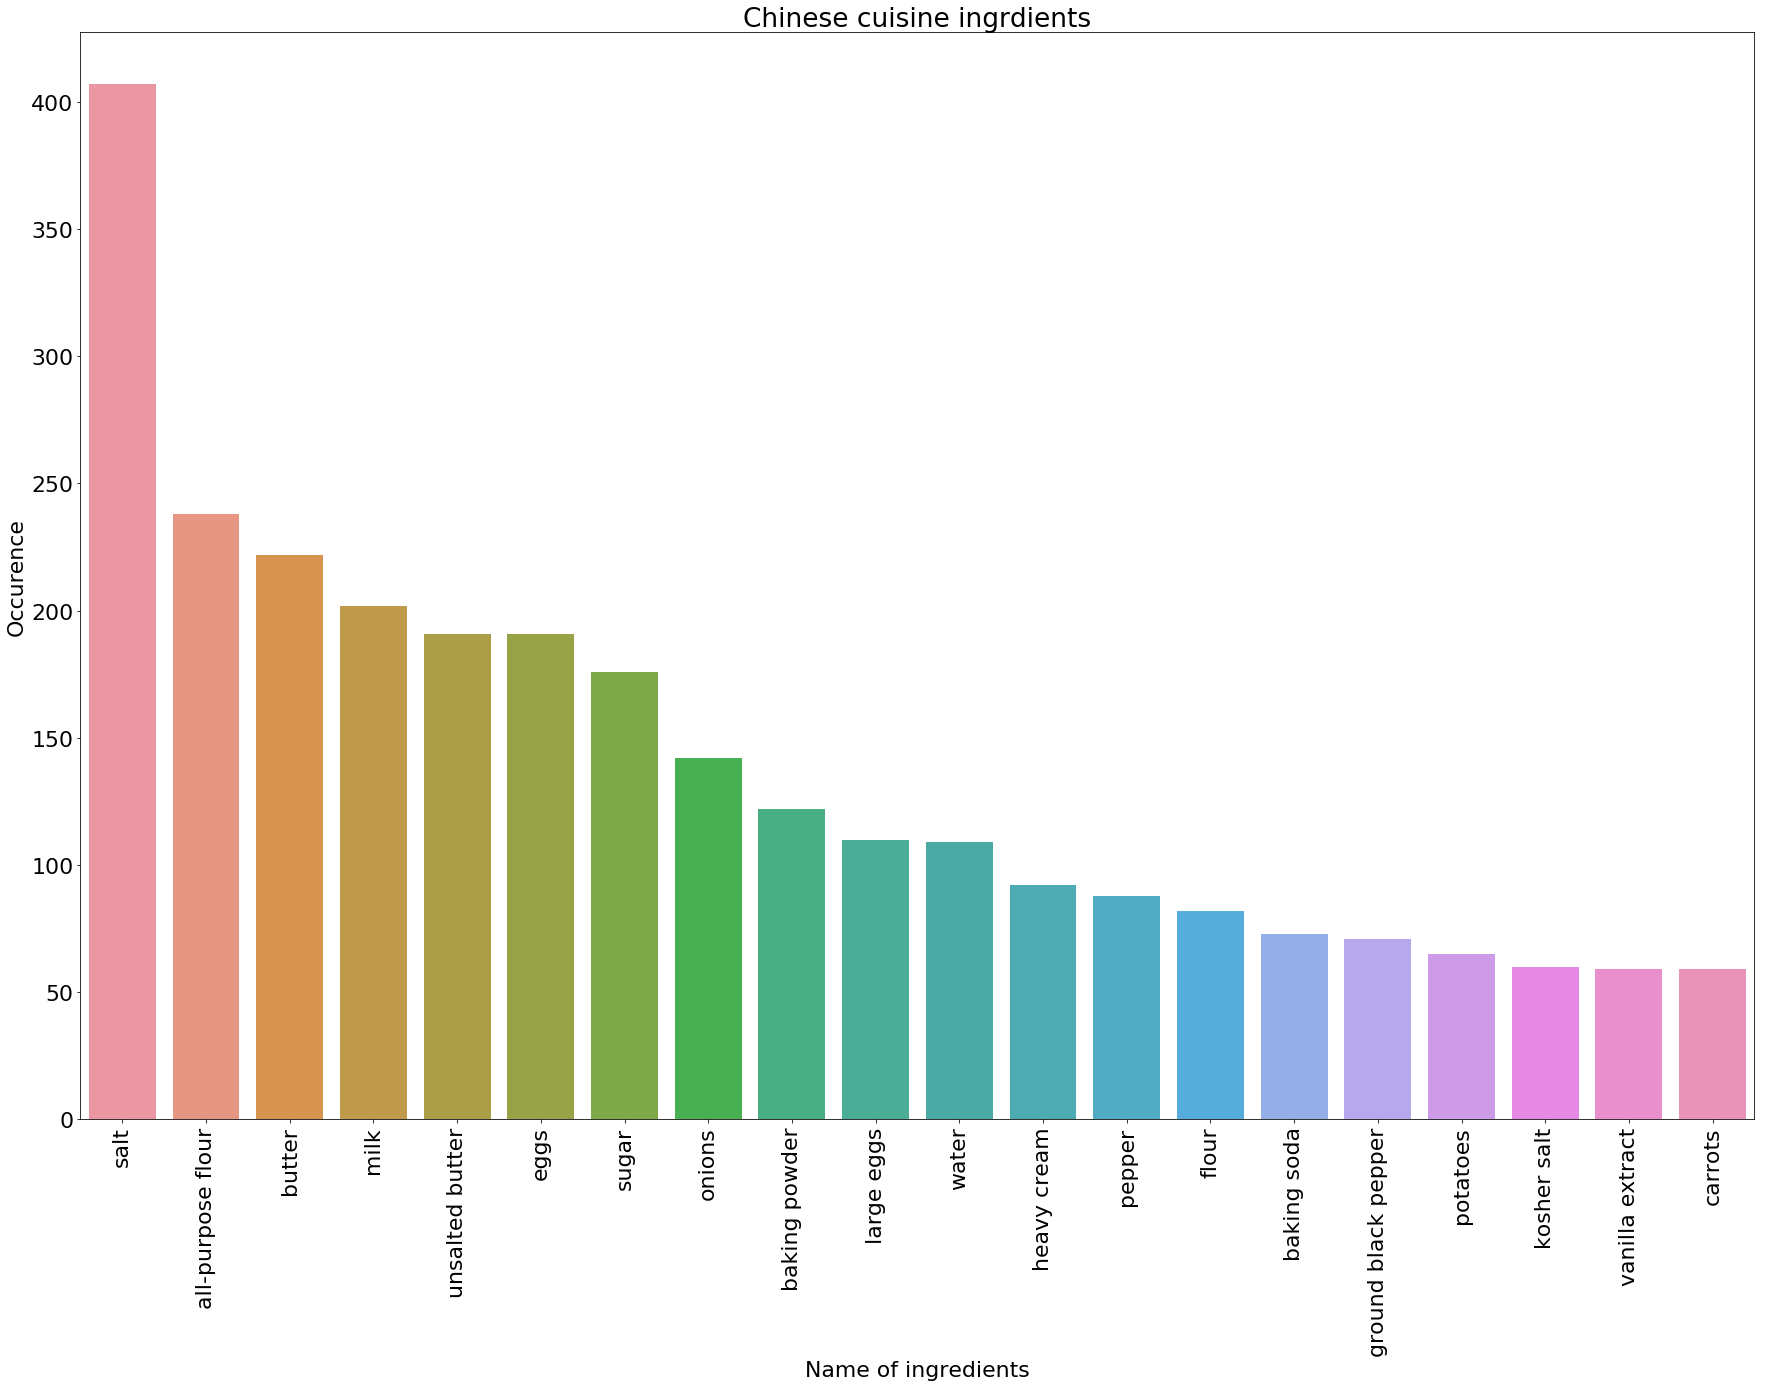

In [76]:
def cuisine_ingredients(cuisine_type, top_num=10):
	dish = train[train['Cuisine']==cuisine_type]['Ingredients']
	combined = np.unique(reduce(lambda x,y: x+y, dish), return_counts=True)
	top_count = [x for (y,x) in reversed(sorted(zip(combined[1], combined[0])))]
	return top_count[:top_num], list(reversed(sorted(combined[1])))[:top_num]

cuisine_unique = np.unique(cuisine)

chinese = cuisine_ingredients('british', 20)

matplotlib.rcParams.update({'font.size': 22})

fig, ax = plt.subplots(figsize=(30,20))
sns.barplot(chinese[0],chinese[1])
plt.title('Chinese cuisine ingrdients')
plt.xlabel('Name of ingredients')
plt.ylabel('Occurence')
plt.xticks(rotation=90)
plt.show()
